# ISAID INTERNSHIP TASK

#### Importing some important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Supress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

#### Explore the given data

In [3]:
data = pd.read_csv('C:/Users/ashit/Downloads/ML/Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

#### Looking For null Values & Analysis

In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
legal = len(data[data.isFraud == 0])
fraud = len(data[data.isFraud == 1])
legal_percent = legal / (legal + fraud) * 100
fraud_percent = fraud / (legal + fraud) * 100

print('Number of legal Transactions = ', legal)
print('Number of fraud Transactions = ', fraud)
print('Percentage of legal Transactions = ', legal_percent, '%')
print('Percentage of fraud Transactions = ', fraud_percent, '%')

Number of legal Transactions =  6354407
Number of fraud Transactions =  8213
Percentage of legal Transactions =  99.87091795518198 %
Percentage of fraud Transactions =  0.12908204481801522 %


In [8]:
X = data[data['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [9]:
X.shape

(2151495, 11)

## Data Visualization

In [10]:
# Importing Visualization Libraries
import seaborn as sns

#### Heatmap 

<Axes: >

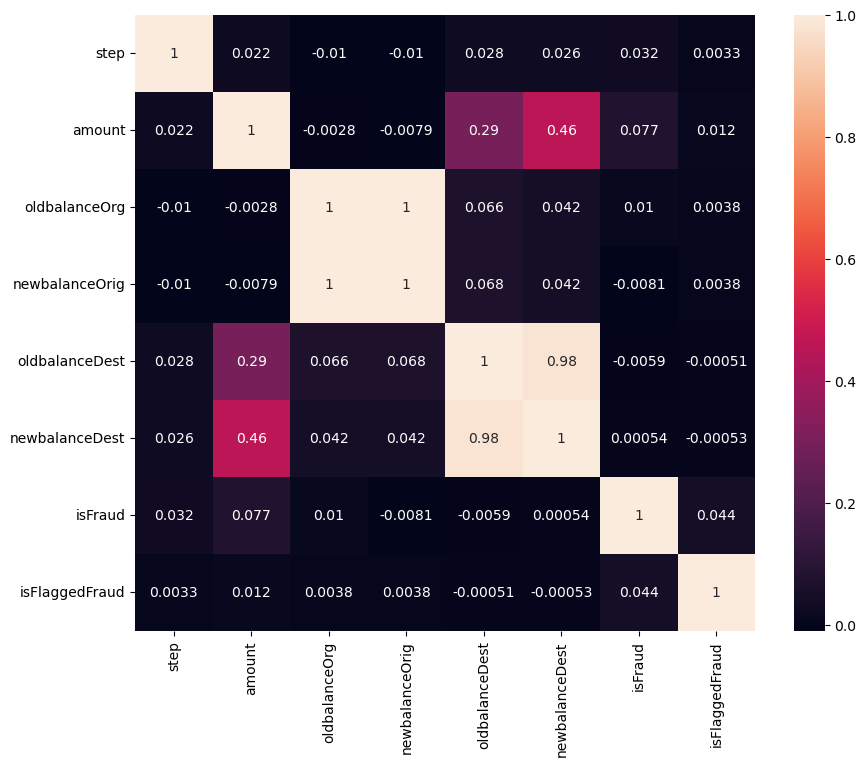

In [11]:
corr = data.corr()
plt.figure(figsize =(10,8))
sns.heatmap(corr, annot = True) 

#### Legal & Fraud Transaction

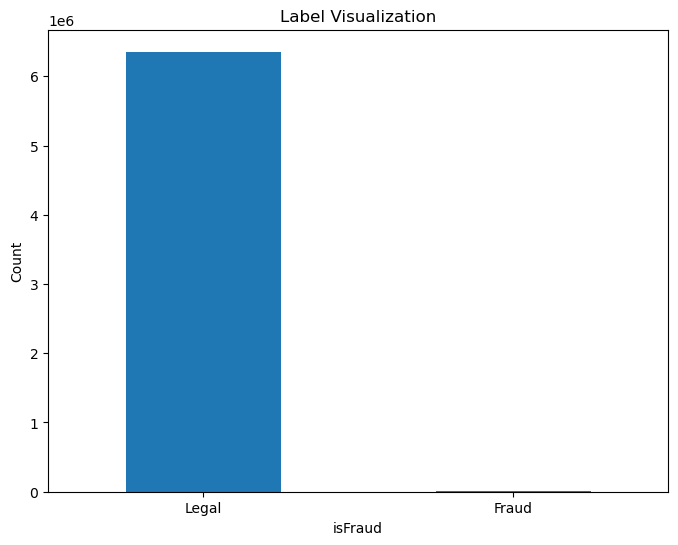

In [12]:
plt.figure(figsize = (8,6))
labels = ['Legal','Fraud']
count_classes = data.value_counts(data['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title('Label Visualization')
plt.ylabel('Count')
plt.xticks(range(2), labels)
plt.show()

In [14]:
# Creating copy of the dataset for training & testing
new_data = data.copy()
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
obj_list = new_data.select_dtypes(include = 'object').columns
print(obj_list)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


## Label Encoding

In [16]:
# import library for label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in obj_list:
    new_data[feat] = le.fit_transform(new_data[feat].astype(str))
    
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [17]:
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [19]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):
    
    # calculating vif
    vif = pd.DataFrame()
    vif['variables'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    
    return(vif)
calc_vif(new_data)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [20]:
new_data['Actual_amount_orig'] = new_data.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_data['Actual_amount_dest'] = new_data.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_data['TransactionPath'] = new_data.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_data = new_data.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_data)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


In [36]:
new_data.head()

,type,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath,NormalizedAmount
0,3,0,0,9839.64,0.0,2419963.0,-0.281560
1,3,0,0,1864.28,0.0,3922922.0,-0.294767
2,4,1,0,181.00,0.0,1441841.0,-0.297555
3,1,1,0,181.00,21182.0,6219958.0,-0.297555
4,3,0,0,11668.14,0.0,4274900.0,-0.278532


#### Heatmap

<Axes: >

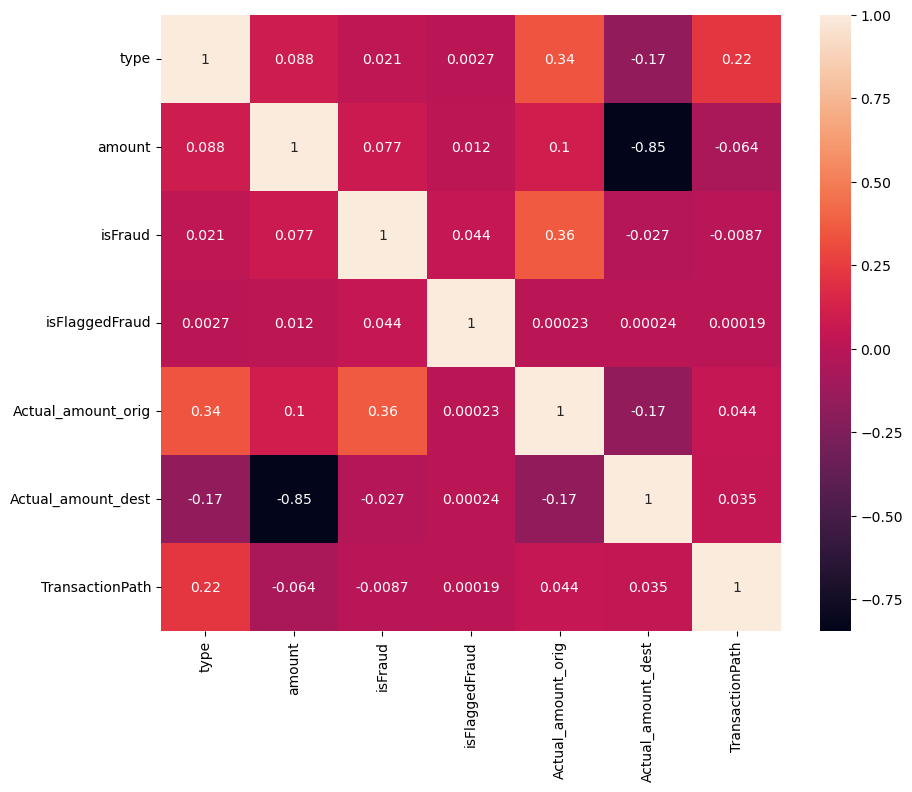

In [21]:
corr = new_data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)

## Model Building

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Scaling And spliting data

In [23]:
# We have to perform scaling
scaler = StandardScaler()
new_data['NormalizedAmount'] = scaler.fit_transform(new_data['amount'].values.reshape(-1, 1))
new_data.drop(['amount'], inplace = True, axis = 1)

y = new_data.isFraud
X = new_data.drop(['isFraud'], axis= 1)

### Train test Split data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('Shape of X_train : ', X_train.shape)
print('Shape of X_test : ', X_test.shape)

Shape of X_train :  (4453834, 6)
Shape of X_test :  (1908786, 6)


### Model Training with decision tree

In [27]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predictions
dt.predict(X_test)

### Accuracy of Decision Tree Model

In [31]:
print('Accuracy of Decision Tree Model : ', (dt.score(X_test, y_test)) * 100, '%' )

Accuracy of Decision Tree Model :  99.92372115051137 %


### Model Training with Random Forest

In [33]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Predictions
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy of Random Forest Model

In [35]:
print('Accuracy of Random Forest Model : ', (rf.score(X_test, y_test)) * 100, '%' )

Accuracy of Random Forest Model :  99.95876960539316 %


#### 1. Data cleaning including missing values ?
We check for the missing values in the dataset but there is no any missing values in the dataset, If there is any missing value in the dataset we simply drop those coloumns and rows from the dataset because the dataset is pretty big, another way to deal with the missing values is to fill it with the mean values. 

#### 2. Describe your fraud detection model in elaboration.
We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legalto be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.


Also the reason I have chosen this model is because of highly unbalanced dataset (Legal: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.

#### 3. How did you select variables to be included in the model?
type, isFraud, isFlaggedFraud, Actual_amount_orig, Actual_amount_dest, TransactionPath, NormalizedAmount these are the variables i used in the model. These are the most important factorts in the dataset they are relates to each other, coloms with no use we droped


#### 4. What are the key factors that predict fraudulent customer?

The source of request is secured or not ?
Is the name of organisation asking for money is legit or not ?
Transaction history of vendors.

#### 5. What kind of prevention should be adopted while company update its infrastructure?

1. Use smart vertified apps only.
2. Browse through secured websites.
3. Use secured internet connections (USE VPN).
4. Keep your mobile and laptop security updated.
5. Don't respond to unsolicited calls/SMS(s/E-mails.
6. If you feel like you have been tricked or security compromised, contact your bank immidiately.

#### 6. Assuming these actions have been implemented, how would you determine if they work?

1. Bank sending E-statements.
2. Customers keeping a check of their account activity.
3. Always keep a log of your payments.